primer pract : https://colab.research.google.com/drive/1zqpj1CM7sC6cplizjvHaKBNLWVeqUcQy
segundo : https://colab.research.google.com/drive/1CCwTta7HkXXqHiZ7QmoDexYB2yO8WB0P
tercer prac : https://colab.research.google.com/drive/10JMaJRHMipwWTbNQquf5_7fji421TPBS
cuarto: https://colab.research.google.com/drive/160d6SJQ6f7NTmU7LjzmgZJ5YZEQ8rGTh
quinto: https://colab.research.google.com/drive/1mFI55WEV0BLmrEnj_TOLWkGUHw_drag1

# Introducción

## Descripción del problema

En una clínica hay tareas que son rutinarias y automatizables y otras que no. La gente que va a una clínica llega con distintos problemas a resolver de distintos grados de urgencia.

Nosotres en mi equipo en Kunan pensamos una solución para las tareas de urgencia baja y gran potencial de automatización, con el espíritu de que eso libere la carga a personas de tener trabajos repetitivos y que se puedan enfocar en los casos más urgentes o que necesiten más expertise.

Estas acciones son las de:
- sacar un turno para un médico de una especialidad, en una sede, en un horario.
- consultar los turnos vigentes que un paciente tiene.
- cancelar un turno vigente.
A estas acciones rutinarias se le agregan
- poder pasar a hablar con un humano
- responder preguntas frecuentes (¿dónde queda la clínica? ¿qué horarios de atención tienen? ¿qué médicos hay?)

En la mayoría de las clínicas la gente realiza esas acciones hablando con unx secretarix directamente a través de Whatsapp o a través de una página web de la clínica. Pensar en términos de interfaces gráficas como la de un sitio web es algo con larga tradición dentro del desarrollo de productos de software, pero resulta interesante la adopción de Whatsapp especialmente en latinomérica, donde las personas están acostumbradas a una interfaz conversacional.

Un asistente conversacional ofrece una interfaz textual conversacional para la toma de acciones. En vez de apretar botones las personas van guiando a un chatbot a través de opciones en formularios, y 

Este producto tiene ese desafío doble: ser un producto de NLP en español y ser un producto de Datos en la industria.

## Motivación

Cada persona al relacionarse con un producto de software trae consigo su universo de saberes, sus necesidades y sus costumbres, que decantarán en su percepción sobre qué cosas son "fáciles" de hacer con un software y qué cosas serán  "complicadas".

Las interfaces conversacionales dejan abierta la puerta a que las personas usen sus lenguajes para interactuar con un software. 


## Descripción del dataset

El dataset corresponde a conversaciones reales de pacientes con el bot, con datos recolectados por el canal de comunicación de Whatsapp, desde diciembre de 2021 hasta marzo del 2022. Tiene los mensajes de cada conversación, tanto emitidos por el bot como por el usuario y taggeados correspondientemente.

- **From_anon**: Número de teléfono emisor del mensaje. (Anonimizado)
- **To_anon**: Número de teléfono receptor del mensaje.(Anonimizado)
- **Hospital**: Nombre del hospital.
- **Tel_hospital**: Teléfono del hospital.
- **Body**: Cuerpo del mensaje.
- **Status**: Indica si el mensaje se recibió/leyó.
- **SentDate**: Año, mes, día, hora, minutos y segundos en el que se envió el mensaje.
- **Fecha**: Año, mes y día formato: aaaa-mm-dd
- **Dia**: día del mes
- **Hora**: hora del mensaje (hh)
- **Messages**: Siempre vale 1. Variable para utilizar agrupaciones.
- **Direction**: Dirección del mensaje ya sea de entrada (inbound) o salida (outbound-api).
- **Appointment_msp**: Mensaje de turno confirmado con la especialidad solicitada.
- **Appointment**: valor dicotómico 1 indica que sacó turno y 0 que no.
- **Cancellation_msp**: Mensaje de turno cancelado que contiene la especialidad cancelada.
- **Cancelled**: valor dicotómico 1 indica que canceló efectivamente el turno y 0 que no se canceló.
- **Consult**: valor dicotómico 1 indica que se consultaron los turnos y 0 que no se consultaron
- **Consult_Appoint**: cuerpo del mensaje sobre la consulta realizada.
- **Fail_HH**: valor dicotómico donde 1 indica que no se solicitó HH y no se logró la comunicación.  
- **Got_HH**: valor dicotómico donde 1 indica que la persona solicitó y logró contactarse con HH.


### Cargando el dataset

In [10]:
import pandas as pd

df = pd.read_csv("https://raw.githubusercontent.com/kunan-sa/mentoria_2022/master/efm_anon.csv")
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])


### Viendo un par de ejemplos

In [42]:
df.sample(3)

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
15701,Salud Consultorios,whatsapp:+5493515266230,Si,received,2022-03-02 19:04:24+00:00,2022-03-02,2,3,19,1,...,[],0,[],0,[],0,[],0,5595,4856
10555,CityBell,whatsapp:+5492215137770,*Escribe el número de la opción* que quieres e...,read,2022-02-16 10:03:14+00:00,2022-02-16,16,2,10,1,...,[],0,[],0,[],0,[],0,1725,2915
1976,Salud Consultorios,whatsapp:+5493515266230,Hmm.. ese número no esta dentro las opciones o...,delivered,2022-01-03 13:39:23+00:00,2022-01-03,3,1,13,1,...,[],0,[],0,[],0,[],0,2250,2182


### Características del dataset

Cantidad de datos

In [14]:
len(df)

21000

Columnas

In [16]:
df.columns

Index(['Hospital', 'Tel_hospital', 'Body', 'Status', 'SentDate', 'Fecha',
       'Dia', 'Mes', 'Hora', 'Messages', 'Direction', 'Appointment_msp',
       'Appointment', 'Cancellation_msp', 'Cancelled', 'consult',
       'Consult_Appoint', 'fail_HH_sms', 'Fail_HH', 'achieve_HH', 'Got_HH',
       'Cupo', 'Full_turnos_obra_social', 'No_Relation', 'No_Correlation',
       'has_error', 'Error_Interno', 'has_error_501', 'Error_501',
       'falla_api_externo', 'Falla_Api_Externo', 'alta_dni', 'not_DNI',
       'issue_name', 'Issue_Name', 'ask_kunan', 'Ask_Kunan',
       'many_fallbacks_goto_hh', 'Many_Fallbacks_Goto_HH', 'From_anon',
       'To_anon'],
      dtype='object')

In [7]:
df.describe()

,Unnamed: 0,Unnamed: 0.1,Dia,Mes,Hora,Messages,Appointment,Cancelled,Consult_Appoint,Fail_HH,...,No_Correlation,Error_Interno,Error_501,Falla_Api_Externo,not_DNI,Issue_Name,Ask_Kunan,Many_Fallbacks_Goto_HH,From_anon,To_anon
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.0,21000.000000,21000.000000,21000.000000,21000.000000,...,21000.000000,21000.000000,21000.000000,21000.00000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,1332.833333,4392.357143,8.766905,2.339571,14.902476,1.0,0.012429,0.002762,0.002524,0.004286,...,0.001857,0.000571,0.002476,0.00019,0.008190,0.001524,0.000095,0.002381,2929.046571,2909.619524
std,904.156603,2836.975043,7.413395,0.644018,3.342678,0.0,0.110791,0.052482,0.050175,0.065326,...,0.043056,0.023898,0.049701,0.01380,0.090132,0.039007,0.009759,0.048738,1638.239791,1658.363620
min,0.000000,0.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,477.000000,1749.750000,2.000000,2.000000,12.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1725.000000,1665.000000
50%,1249.500000,4249.500000,3.000000,2.000000,15.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,2624.000000,2520.000000
75%,2124.250000,6874.250000,16.000000,3.000000,17.000000,1.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3750.000000,3999.250000
max,2999.000000,9499.000000,28.000000,3.000000,23.000000,1.0,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,7478.000000,7182.000000


## Leyendo una conversación

Ordenando por From_anon y por SentDate se puede seguir el hilo de una conversación

In [49]:
# Conversaciones de una sola persona
df[(df["From_anon"]==4048) | (df["To_anon"]==4048)].sort_values(by="SentDate")

,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
6375,Salud Consultorios,whatsapp:+5493515266230,Hola buenas tardes necesitaria un turno para l...,received,2022-02-16 14:27:48+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6364,Salud Consultorios,whatsapp:+5493515266230,Sacar turno,received,2022-02-16 14:28:28+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6359,Salud Consultorios,whatsapp:+5493515266230,XXXXXXXX,received,2022-02-16 14:28:42+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6346,Salud Consultorios,whatsapp:+5493515266230,XXXXXXXXXXXXX,received,2022-02-16 14:29:16+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6338,Salud Consultorios,whatsapp:+5493515266230,Si,received,2022-02-16 14:29:39+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6325,Salud Consultorios,whatsapp:+5493515266230,4,received,2022-02-16 14:30:13+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6319,Salud Consultorios,whatsapp:+5493515266230,No,received,2022-02-16 14:30:42+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6315,Salud Consultorios,whatsapp:+5493515266230,Sacar turno,received,2022-02-16 14:30:57+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6313,Salud Consultorios,whatsapp:+5493515266230,XXXXXXXX,received,2022-02-16 14:31:08+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360
6310,Salud Consultorios,whatsapp:+5493515266230,XXXXXXXXXXXXX,received,2022-02-16 14:31:25+00:00,2022-02-16,16,2,14,1,...,[],0,[],0,[],0,[],0,4048,3360


### Obteniendo datos de enero

In [22]:
enero = df[df["Mes"] == 1]
print(len(enero))
enero.sample(3)

2000


,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
311,Carra,whatsapp:+5493515266217,*Escribe el número de la opción* que quieres e...,read,2022-01-03 19:11:08+00:00,2022-01-03,3,1,19,1,...,[],0,[],0,[],0,[],0,2249,3047
42,Carra,whatsapp:+5493515266217,"Necesito tu DNI, por favor.",read,2022-01-02 18:56:42+00:00,2022-01-02,2,1,18,1,...,[],0,[],0,[],0,[],0,2249,3225
154,Los Cedros,whatsapp:+5491120401203,Si,received,2022-01-03 20:01:45+00:00,2022-01-03,3,1,20,1,...,[],0,[],0,[],0,[],0,681,10


### Datos de enero que son de pacientes

In [24]:
enero_inbound = enero[enero["Direction"]=="inbound"]
print(len(enero_inbound))
enero_inbound.sample(4)

829


,Hospital,Tel_hospital,Body,Status,SentDate,Fecha,Dia,Mes,Hora,Messages,...,alta_dni,not_DNI,issue_name,Issue_Name,ask_kunan,Ask_Kunan,many_fallbacks_goto_hh,Many_Fallbacks_Goto_HH,From_anon,To_anon
1328,Carra,whatsapp:+5493515266217,Si,received,2022-01-03 15:42:51+00:00,2022-01-03,3,1,15,1,...,[],0,[],0,[],0,[],0,3640,2121
949,Carra,whatsapp:+5493515266217,8119,received,2022-01-03 17:04:27+00:00,2022-01-03,3,1,17,1,...,[],0,[],0,[],0,[],0,3787,2121
54,Carra,whatsapp:+5493515266217,2,received,2022-01-02 16:08:44+00:00,2022-01-02,2,1,16,1,...,[],0,[],0,[],0,[],0,3695,2121
1890,Carra,whatsapp:+5493515266217,XXXXXXXX,received,2022-01-03 13:57:25+00:00,2022-01-03,3,1,13,1,...,[],0,[],0,[],0,[],0,2944,2121


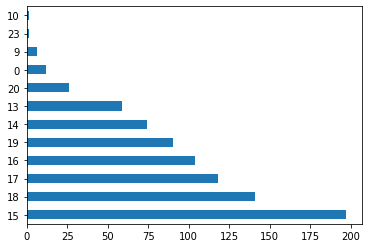

In [30]:
enero_inbound["Hora"].value_counts().plot(kind='barh')

# Introducción 
- cargar dataset
- mostrar 10 ejemplos random

- describir el dataset (cantidad de filas, de columnas, tipo de datos, semántica, rangos que toman)
- hay columnas derivadas?
- mostrar de ejemplo un filtrado de la muestra total a un df solo con enero
- mostrar en seaborn un gráfico de cantidad de mensajes por día de la semana en enero

# Visualización
Por mes, por hora, por dia de la semana
- hacer un grafico que muestre la cantidad de mensajes por mes, por hospital
- hacer un grafico que muestre la cantidad de turnos sacados por mes, por hospital
- hacer un grafico que muestre la cantidad de turnos consultados por mes, por hospital
- hacer un grafico que muestre la cantidad de turnos cancelados por mes, por hospital
- hacer un grafico que muestre la cantidad de pasajes a HH por mes, por hospital
